C:\Users\shoot\AppData\Local\Temp\ipykernel_14532\3548186528.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='1949-01', periods=144, freq='M')


RMSE: 11.47, MAE: 8.99


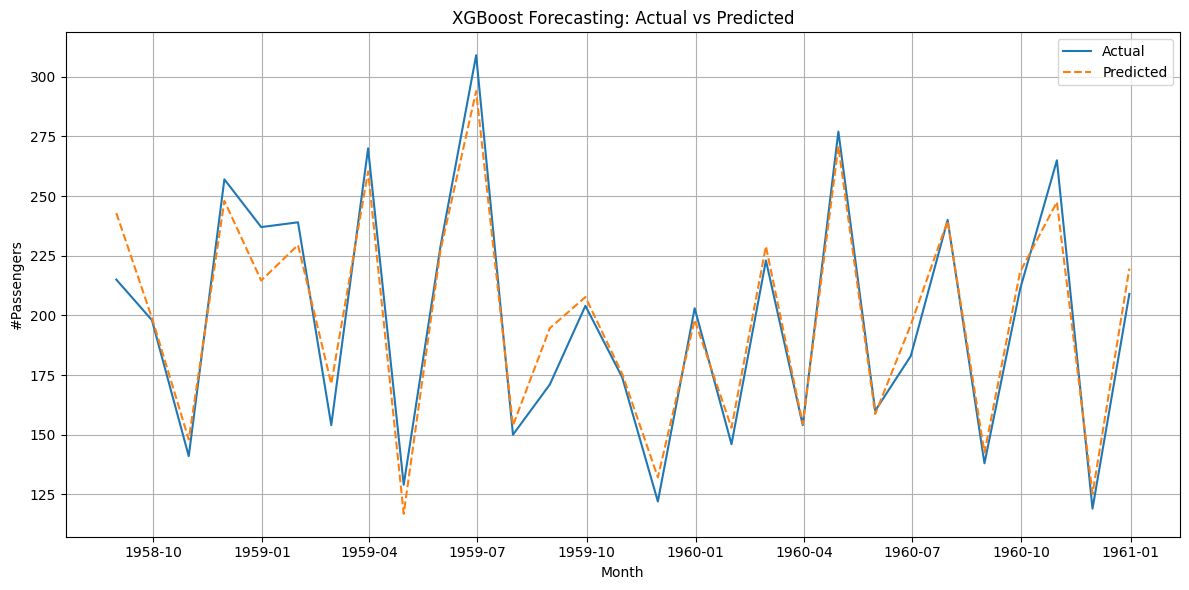

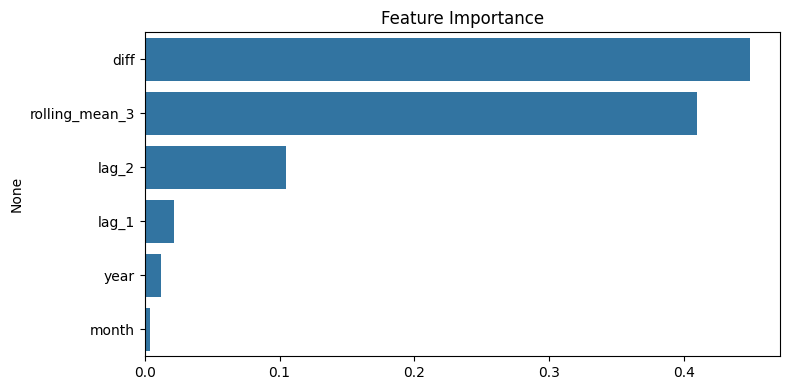

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# 데이터
months = pd.date_range(start='1949-01', periods=144, freq='M')
passengers = np.abs(np.random.normal(loc=200, scale=50, size=144)).astype(int)
df = pd.DataFrame({'Month': months, '#Passengers': passengers})

# 피처 생성
df['lag_1'] = df['#Passengers'].shift(1)
df['lag_2'] = df['#Passengers'].shift(2)
df['diff'] = df['#Passengers'].diff()
df['rolling_mean_3'] = df['#Passengers'].rolling(window=3).mean()
df['month'] = df['Month'].dt.month
df['year'] = df['Month'].dt.year
df = df.dropna().reset_index(drop=True)

# 학습/테스트 분할
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
features = ['lag_1', 'lag_2', 'diff', 'rolling_mean_3', 'month', 'year']
X_train = train[features]
y_train = train['#Passengers']
X_test = test[features]
y_test = test['#Passengers']

# 모델 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

# 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(test['Month'], y_test.values, label='Actual')
plt.plot(test['Month'], y_pred, label='Predicted', linestyle='--')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.title('XGBoost Forecasting: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 피처 중요도 시각화
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### 전통 시계열 모델 대신, 파생 피처 기반의 XGBoost 회귀 모델을 사용해 예측을 진행했습니다.